## Bollinger Bands trading strategy for crypto
* Trendline plotted 2 standard deviations (positive and negative) away from a simple moving average (SMA) 
* Used to identify an asset that is over-bought or over-sold i.e closer the price to the upper band the more over-bought and closer to the lower band it is more over-sold.  
* **Sqeeze**: when the bands come close together - sign of low volatitity signaling a more volatile period lies ahead - does not predict when these periods will occur
*Source:https://www.investopedia.com/terms/b/bollingerbands.asp#:~:text=What%20Is%20a%20Bollinger%20Band,be%20adjusted%20to%20user%20preferences.*

Source code: https://www.youtube.com/watch?v=gEIw2iUlFYc&ab_channel=ComputerScience


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Read the file in from device
df = pd.read_csv('BTC_INR.csv')

In [3]:
# Change the index to the date
df = df.set_index(pd.DatetimeIndex(df['Date'].values)) 
df.index.name = 'Date'
df.drop(columns=['Date'], inplace=True)

In [4]:
# Check of null values in the data
filt = df['Open'].isnull()
df[filt]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# There is 1 day of missing values. Using linear interpolate to fill that value
df = df.interpolate()
# Missing values filled in using interpolate()
df[filt]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-04,834176.75,872190.40625,831134.90625,861993.21875,861993.21875,1.674818e+12


### Visualise the data

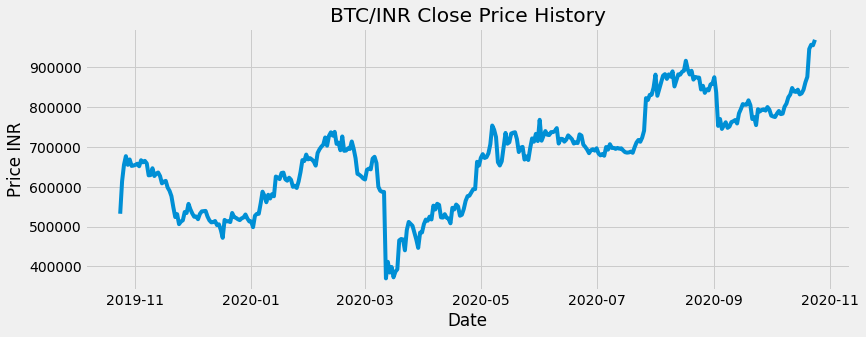

In [6]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('BTC/INR Close Price History')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.show()

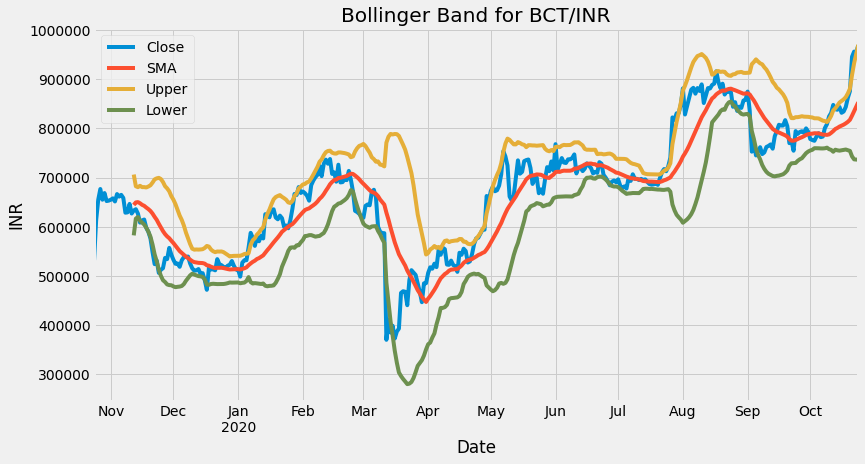

In [7]:
# Calculate the simple moving average, standard deviation, upper band & lower band
# Get the time period
period = 20

# Calculate the simple moving average(SMA)
df['SMA'] = df['Close'].rolling(window=period).mean()

# Get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std()

# Calculate the upper Bollinger Band
df['Upper'] = df['SMA'] + (df['STD'] * 2)

# Calculate the lower Bollinger Band
df['Lower'] = df['SMA'] - (df['STD'] * 2)

# Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']

# Plot the data
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Bollinger Band for BCT/INR')
plt.ylabel('INR')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


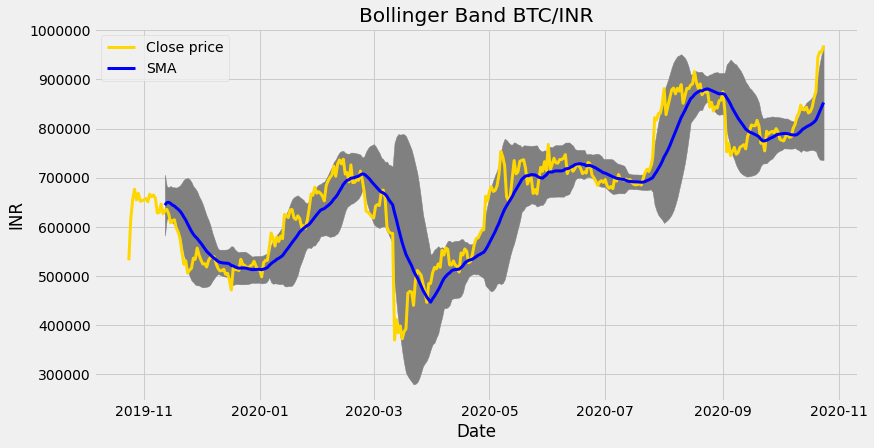

In [8]:
# Plot and shade the area between the two Bollinger bands
fig = plt.figure(figsize=(12.2, 6.4))
ax = fig.add_subplot(1,1,1)
x_axis = df.index
# Plot and shade the area between the upper and lower band
ax.fill_between(x_axis, df['Upper'], df['Lower'], color= 'grey')
# Plot the closing price and moving average 
ax.plot(x_axis, df['Close'], color='gold', lw=3, label='Close price')
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label='SMA')
ax.set_title('Bollinger Band BTC/INR')
ax.set_xlabel('Date')
ax.set_ylabel('INR')
ax.ticklabel_format(style='plain', axis='y')
# plt.xticks(rotation=45)
ax.legend()
plt.show()


In [9]:
# Get the buy and sell signals
new_df = df[period-1:]
new_df

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2019-11-12,626922.3125,635611.9375,623526.8125,632876.3125,632876.3125,1.458038e+12,644169.809375,30920.775502,706011.360379,582328.258371
2019-11-13,632615.8125,637591.2500,632166.1250,635529.2500,635529.2500,1.265952e+12,649340.790625,16460.776661,682262.343947,616419.237303
2019-11-14,635794.3125,635238.0625,625566.4375,626685.0000,626685.0000,1.373449e+12,649998.837500,15165.703202,680330.243905,619667.431095
2019-11-15,626513.2500,625436.1250,607811.8125,608323.8750,608323.8750,1.561418e+12,647669.340625,17732.050858,683133.442342,612205.238908
2019-11-16,608264.6875,615620.8125,607164.3750,612666.1875,612666.1875,1.181903e+12,644470.478125,17998.764487,680468.007100,608472.949150
...,...,...,...,...,...,...,...,...,...,...
2020-10-20,862122.8750,881448.0000,856953.3750,875624.8125,875624.8125,2.271727e+12,817301.387500,31613.697086,880528.781673,754073.993327
2020-10-21,875385.4375,971858.1250,874730.8750,945436.7500,945436.7500,3.200784e+12,825662.968750,41346.369781,908355.708312,742970.229188
2020-10-22,943810.8125,969913.3750,937535.9375,955938.8750,955938.8750,2.560528e+12,834653.325000,48873.016770,932399.358540,736907.291460


In [10]:
# function to get the buy & sell singnals

def get_signal(data):

    buy_signal = []
    sell_signal = []

    for i in range(len(data['Close'])):
        if data['Close'][i] > data['Upper'][i]: # Check to see if the Close is greater than Upper -> sell
            sell_signal.append(data['Close'][i])
            buy_signal.append(np.nan)
        elif data['Close'][i] < data['Lower'][i]: # Check to see if the Close is lower than Lower -> buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    
    return (buy_signal, sell_signal)


In [11]:
# Create columns with the buy and sell signals

new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

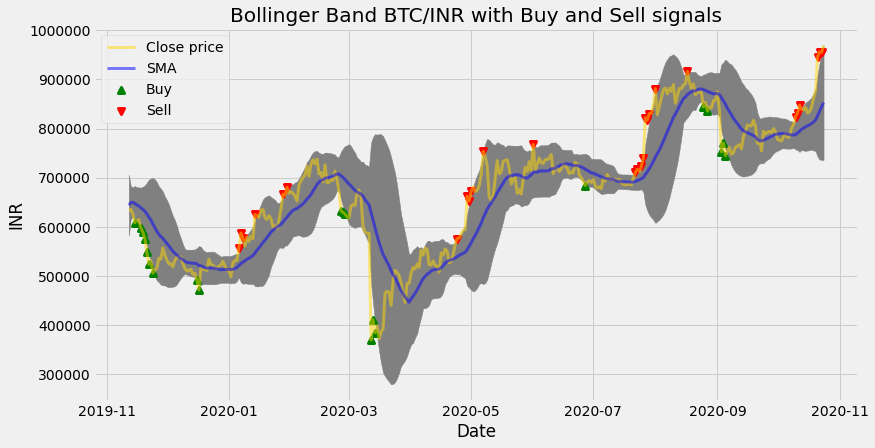

In [12]:
# Plot the buy and sell signals

fig = plt.figure(figsize=(12.2, 6.4))
ax = fig.add_subplot(1,1,1)
x_axis = new_df.index
# Plot and shade the area between the upper and lower band
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color= 'grey')
# Plot the closing price and moving average 
ax.plot(x_axis, new_df['Close'], color='gold', lw=3, label='Close price', alpha=0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=3, label='SMA', alpha=0.5)
ax.scatter(x_axis, new_df['Buy'], lw=3, color='green', label='Buy', marker='^', alpha=1)
ax.scatter(x_axis, new_df['Sell'], lw=3, color='red', label='Sell', marker='v', alpha=1)
ax.set_title('Bollinger Band BTC/INR with Buy and Sell signals')
ax.set_xlabel('Date')
ax.set_ylabel('INR')
# plt.xticks(rotation=45)
ax.ticklabel_format(style='plain', axis='y')
ax.legend()
plt.show()

In [70]:
def get_profit(buy_list, sell_list):
    ''' Takes a list of buys (buy_list) and a list of
        sells (sell_list) and returns the profit.
        The function will check if the buy price is 
        less than sell price and then executes the sell.
        If not it will continue to hold the buy.  
    '''
    buys = buy_list.copy()
    sells = sell_list.copy()
    profits = []
    
    for i in range(len(buy_list if len(buy_list) < len(sell_list) else sell_list)):
        buy = buys[0]
        if buy > max(sells):
            buys.pop(0)
        else:
            for s_ind, sell in enumerate(sells):
                if buy > sell:
                    continue
                else: 
                    profits.append(sell-buy)
                    buys.pop(0)
                    sells.pop(s_ind)
                    break
    return profits

In [81]:
new_df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,
2019-11-12,626922.3125,635611.9375,623526.8125,632876.3125,632876.3125,1.458038e+12,644169.809375,30920.775502,706011.360379,582328.258371,NaN,NaN
2019-11-13,632615.8125,637591.2500,632166.1250,635529.2500,635529.2500,1.265952e+12,649340.790625,16460.776661,682262.343947,616419.237303,NaN,NaN
2019-11-14,635794.3125,635238.0625,625566.4375,626685.0000,626685.0000,1.373449e+12,649998.837500,15165.703202,680330.243905,619667.431095,NaN,NaN
2019-11-15,626513.2500,625436.1250,607811.8125,608323.8750,608323.8750,1.561418e+12,647669.340625,17732.050858,683133.442342,612205.238908,608323.875,NaN
2019-11-16,608264.6875,615620.8125,607164.3750,612666.1875,612666.1875,1.181903e+12,644470.478125,17998.764487,680468.007100,608472.949150,NaN,NaN


In [90]:
buy_signal_entries = new_df[new_df.Buy.notna()].copy()

In [88]:
buy_price_high = buy_signal_entries['High'].values
buy_price_high

array([625436.125 , 622561.0625, 604244.375 , 591254.25  , 581903.625 ,
       552615.125 , 531889.3125, 508462.75  , 494693.    , 672421.4375,
       640131.1875, 637712.875 , 588143.    , 430809.0625, 416036.125 ,
       696368.3125, 873591.0625, 855094.4375, 838189.375 , 780135.0625,
       775059.875 ])

In [91]:
sell_signal_entries = new_df[new_df.Sell.notna()].copy()

In [92]:
sell_price_low = sell_signal_entries['Low'].values
sell_price_low

array([531963.5   , 559052.1875, 568486.875 , 576826.625 , 634641.3125,
       660655.3125, 564956.1875, 591778.6875, 643129.3125, 653642.    ,
       695609.125 , 713482.375 , 697086.8125, 710468.4375, 712142.25  ,
       721306.125 , 740086.625 , 796006.5   , 813217.8125, 842188.3125,
       883527.0625, 806727.625 , 823631.8125, 824034.5   , 874730.875 ,
       937535.9375, 941559.1875])

In [93]:
def get_trade_value(buy_price, sell_price, stake):
    ''' Calculates the profit/loss of a sale given 
        the purchase price of an asset (buy_price), 
        the sales price of the asset (sell_price) &
        and the amount invested in the asset'''
    BTC_one_INR = 1/buy_price
    amount_purchased = BTC_one_INR * stake
    sales_value = amount_purchased * sell_price
    return round(sales_value - stake,2)

In [94]:
# Get the buy-sell price pairs in the order the buy buy-sell signals came in 
buy_sell_pairs = [[buy_price_high[i], sell_price_low[i]] for i in range(min(len(buy_price_high), (len(sell_price_low))))]

In [95]:
# Get the profit/loss of executing the buy-sell for 
stake_bid = 10000 
sale_values = [get_trade_value(b,s,stake_bid) for b,s in buy_sell_pairs]
sale_values

[-1494.52,
 -1020.12,
 -591.77,
 -244.02,
 906.3,
 1955.07,
 621.69,
 1638.58,
 3000.57,
 -279.28,
 866.67,
 1188.14,
 1852.34,
 6491.49,
 7117.32,
 358.11,
 -1528.23,
 -691.01,
 -297.92,
 795.42,
 1399.47]

In [99]:
print(f'We would have made INR {round(np.sum(sale_values),2):,} by following Bollinger Lines and staking INR {stake_bid:,} each on {len(sale_values)} trades over a period of a year.\nThis would have yielded a ROI of {round(np.sum(sale_values)/(stake_bid* len(sale_values))*100,2)}%.\nThis does not take into account exchange fees')

We would have made INR 22,044.3 by following Bollinger Lines and staking INR 10,000 each on 21 trades over a period of a year.
This would have yielded a ROI of 10.5%.
This does not take into account exchange fees
